<a href="https://colab.research.google.com/github/ElkinAleman/DataScience/blob/main/Kmean_USArrests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Segmentación

A continuación analizaremos la base de datos USArrests la cual contiene los registro de Asesinatos, Agresion, Violacion, y la proporsión de la población de diferentes estados en de EE.UU.


## Descripción de la base de datos:
Cada fila representa un estado de EE.UU. y las columnas incluyen:

1. Murder: Tasa de asesinatos (homicidios) por cada 100,000 habitantes.
2. Assault: Tasa de asaltos por cada 100,000 habitantes.
3. UrbanPop: Porcentaje de la población que vive en áreas urbanas.
4. Rape: Tasa de violaciones por cada 100,000 habitantes.


In [ ]:
# #!pip install funpymodeling
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
#  Cargamos las librerias a usar

# Manipulacipin de datos
import pandas as pd
import numpy as np
#from funpymodeling import * # !pip install funpymodeling

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer # visualización de los clusters
import plotly.express as px # para gráfico 3D

# Modelado
import statsmodels.api as sm # para extraer la base de datos USArrests
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Advertencias

import warnings
warnings.filterwarnings('ignore')

# SEGMENTECIÓN PARA ANALIZAR LA BASE DE DATOS USArrests

## Objetivo:
Encontrar grupos homogeneos que permita identificar como se distribuye diferentes tipos de inseguridad en los diferentes estados de EE.UU. mediante el uso del algoritmo K-Means. Con este análisis se obtiene información de seguridad para cada uno de los estados.

## Metodología:

1. Exploración de datos
2. Determinación del número optimo de clúster mediante la libreria yellowbrick
3. Aplicación del algoritmo K-Mean
4. Análisis de  

In [59]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
df = USArrests.data.reset_index()

In [9]:
df.head()

,rownames,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [61]:
df = df.set_axis(['Estados', 'Murder','Assault','UrbanPop','Rape'],axis = 1) # Cambio de nombre de nombres de varible
df.head()

,Estados,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
"""
Se veririfica con la función status la cantidad de valores faltantes, los valores
únicos y el tipo de variable.
"""
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Estados,0,0.0,0,0.0,50,object
1,Asesinatos,0,0.0,0,0.0,43,float64
2,Agresion,0,0.0,0,0.0,45,int64
3,Pro_urbano,0,0.0,0,0.0,36,int64
4,Violacion,0,0.0,0,0.0,48,float64


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


# **Visualizaciones**

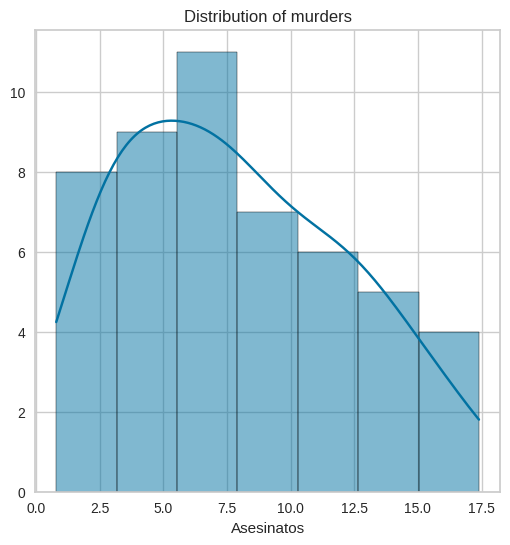

In [66]:
plt.figure(figsize=(6,6))
sns.histplot(x = 'Murder', kde = True, data = df)
plt.title('Distribution of murders')
plt.xlabel('Asesinatos')
plt.ylabel('')
plt.show()

In [67]:
def graficar_histogramas(df, bins=int, figsize=(10, 5)):
    """
    Grafica histogramas de todas las variables numéricas de un DataFrame.

    Parámetros:
    df : pandas.DataFrame -> DataFrame con las variables a graficar.
    bins : int -> Número de divisiones del histograma (por defecto 30).
    figsize : tuple -> Tamaño de la figura (por defecto (10, 5)).
    """
    # Seleccionar solo las columnas numéricas
    df_numeric = df.select_dtypes(include=['number'])

    # Si no hay variables numéricas, mostrar mensaje
    if df_numeric.shape[1] == 0:
        print("No hay variables numéricas en el DataFrame.")
        return

    # Crear subgráficos con 2 columnas
    num_vars = df_numeric.shape[1]
    filas = (num_vars // 2) + (num_vars % 2)  # Calcular filas necesarias

    fig, axes = plt.subplots(filas, 2, figsize=(figsize[0], filas * figsize[1] / 2))
    axes = axes.flatten()  # Asegurar que los ejes sean unidimensionales

    for i, col in enumerate(df_numeric.columns):
        sns.histplot(df_numeric[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histograma de {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos si hay un número impar de variables
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


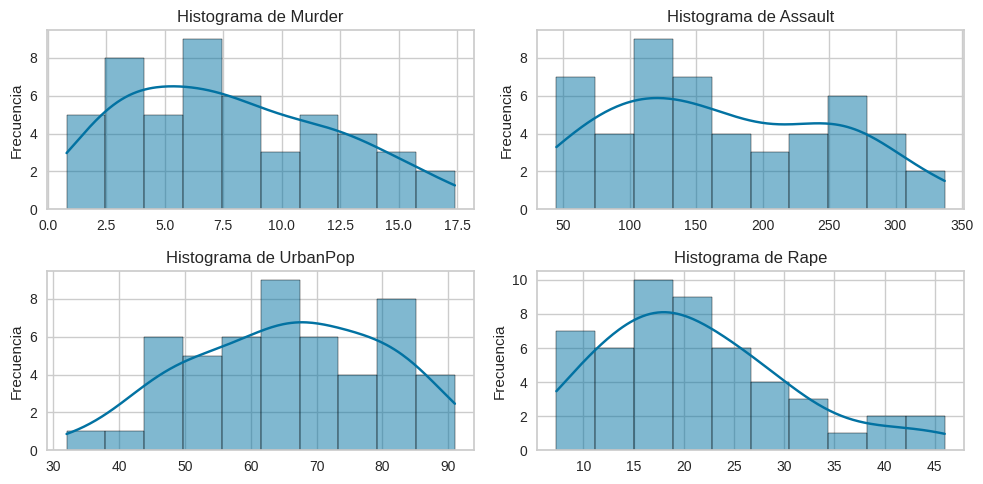

In [68]:
graficar_histogramas(df, bins=10)

In [69]:
# Traspoinemos la base de datos para hacer un gráfico de cajas para comparar las
# diferentes caracteristicas de la base de datos usando la función melt de pandas (pd.melt)
dfg = df.copy()
dfg = pd.melt(dfg, id_vars=['Estados'], var_name='Caracteristicas', value_name="Valor")
dfg.head()

,Estados,Caracteristicas,Valor
0,Alabama,Murder,13.2
1,Alaska,Murder,10.0
2,Arizona,Murder,8.1
3,Arkansas,Murder,8.8
4,California,Murder,9.0


<Figure size 1100x500 with 0 Axes>

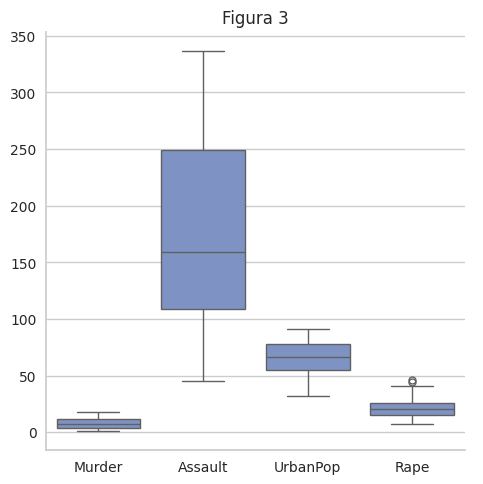

In [70]:
# Cambiar el tema y la paleta de colores
sns.set_style("whitegrid")  # Tema blanco con cuadrículas
#sns.set_palette("pastel")   # Colores suaves

# Crear el gráfico
plt.figure(figsize=(11,5))
sns.catplot(x='Caracteristicas', y='Valor', data=dfg, kind='box', color = '#728FCE')  # Definir tipo de gráfico
plt.title('Figura 3')
plt.ylabel('')
plt.xlabel('')

plt.show()

En la Figura 3 se muestra que los asesinatos y las violaciones se presentan con menos frecuencias. Sin embargo, las agresiones, se presentan mayor mente.

In [ ]:
# !pip install pygwalker
import pygwalker as pyg
#pyg.walk(df)

<Figure size 600x600 with 0 Axes>

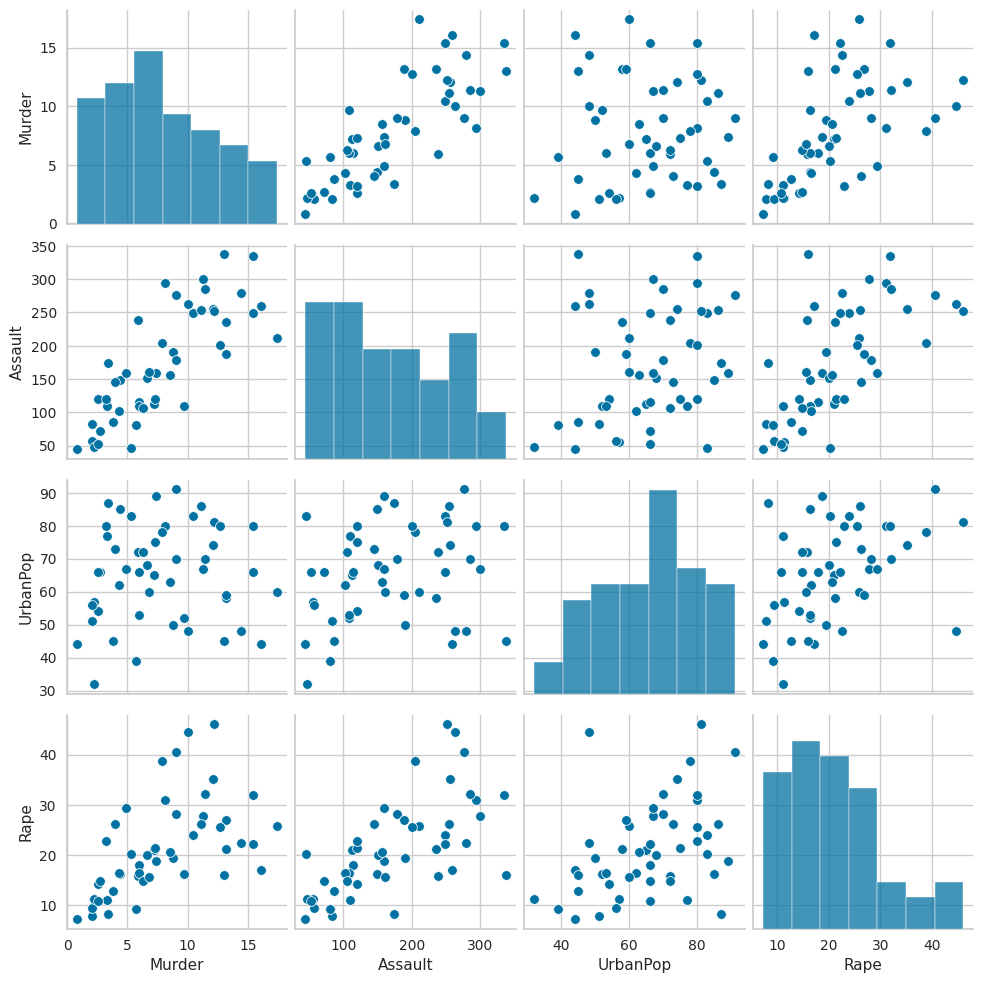

In [71]:
# Relacion entre las variables
plt.figure(figsize=(6,6))
sns.pairplot(df)
plt.show()

In [73]:
corr_matrix = df[['Murder', 'Assault', 'UrbanPop', 'Rape']].corr()
corr_matrix

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<Axes: >

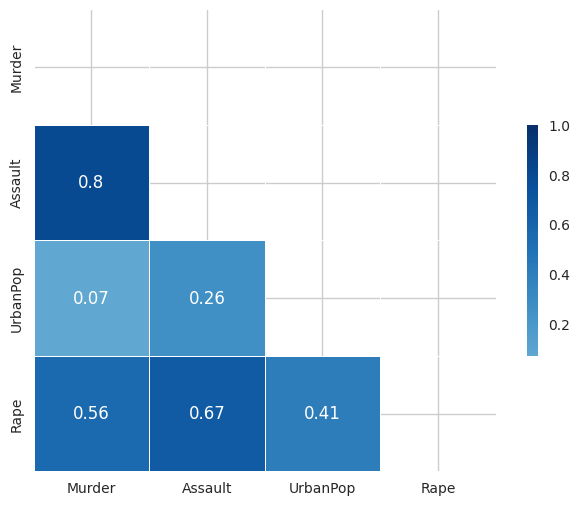

In [74]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, cmap = 'Blues', vmax = 1, center = 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

De acuerdo al gráfico de correlaciones, las variables **Agresión y Asesinatos** tienen una correlación de .8 lo cual es muy cercana a 1. Esto indica que cuando aumentan las agresiones también aumentan los acesinatos y cuando disminuyen las agresiones también disminuyen los acesinatos.

Ahora bien, dado que el coeficiente de correlación es cercano a 1, esto sugiere que la relación lineal es fuerte pero no implica causalidad. Es decir, una agresión no implica directamente un asesinato, para ello deberiamos analizar otros tipos de variables.

# **Estandarización de los datos**

Usaremos el algoritmo de K mean, para ello, es importante escalar los datos para asegurar que todos esten en una misma escala. Asi se evita que las variables con valores grandes domine sobre otros valores más pequeños.

In [75]:
standar = StandardScaler()
df_st = standar.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])
pd.DataFrame(df_st, columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']).head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# **Seleccionamos el numero de clúster idoneos**

Para seleccionar el valor ideal de clúster, usamos la función KElbowVisualizer de la libreria *yellowbrick*. Como se muestra en la figura, el número de clústeres a seleccionar es de 4.

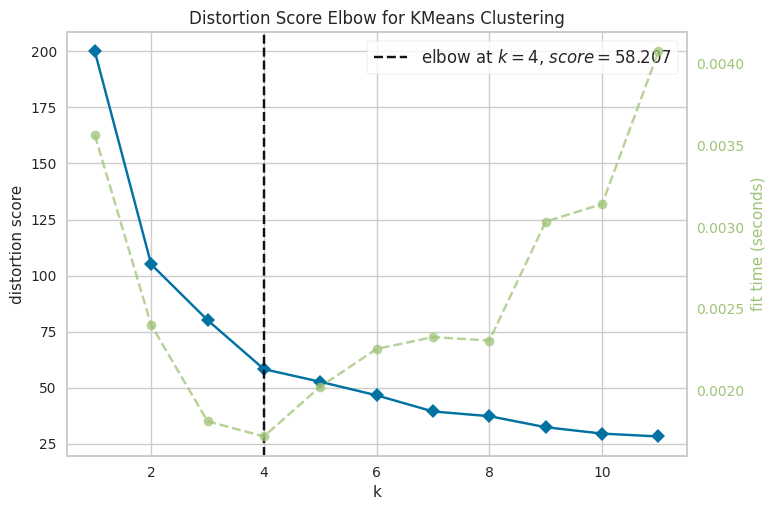

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
modelo = KMeans()
fig = KElbowVisualizer(modelo, k=(1,12))
fig.fit(df_st)
fig.show()

In [ ]:
wcs = []
for i in range(1, 12):
  modelo = KMeans(n_clusters=i, random_state=99)
  modelo.fit(df_st)
  wcs.append(modelo.inertia_)
  print(f'WCSS para {i} clústeres: {modelo.inertia_}')

WCSS para 1 clústeres: 200.0
WCSS para 2 clústeres: 104.96163315756873
WCSS para 3 clústeres: 80.18851631161148
WCSS para 4 clústeres: 58.12889839018575
WCSS para 5 clústeres: 50.967459051021436
WCSS para 6 clústeres: 45.59204161261911
WCSS para 7 clústeres: 41.17481728309239
WCSS para 8 clústeres: 38.08656332328906
WCSS para 9 clústeres: 34.56224438678012
WCSS para 10 clústeres: 30.082496683536878
WCSS para 11 clústeres: 28.440642147198805


# Ejecutamos el modelo K-mean con un número de clúster = 4

In [77]:
modelo = KMeans(n_clusters=4, init='k-means++', random_state=99)
modelo.fit(df_st)

# agregamos los clúster a la data original
df['Grupo'] = modelo.labels_
df.head()

,Estados,Murder,Assault,UrbanPop,Rape,Grupo
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [78]:
# Promedio por caga grupo
mean_g = df.groupby('Grupo')[['Murder', 'Assault', 'UrbanPop', 'Rape']].mean().T
mean_g

Grupo,0,1,2,3
Murder,3.01,10.815385,5.642105,13.9375
Assault,73.80,257.384615,131.842105,243.6250
UrbanPop,49.70,76.000000,71.684211,53.7500
Rape,11.06,33.192308,18.326316,21.4125


In [79]:
new_df = df[['Grupo','Murder', 'Assault', 'Rape']]
new_df.head()
# Crear gráfico interactivo en 3D
fig = px.scatter_3d(new_df,
                    x='Murder',
                    y='Assault',
                    z='Rape',
                    color=new_df['Grupo'].astype(str),  # Convertir cluster a string para colores
                    title="Clusters en 3D de K-Means",
                    labels={'Grupo': 'Cluster'},
                    opacity=0.8)

fig.update_traces(marker=dict(size=6))  # Ajustar tamaño de los puntos
fig.show()

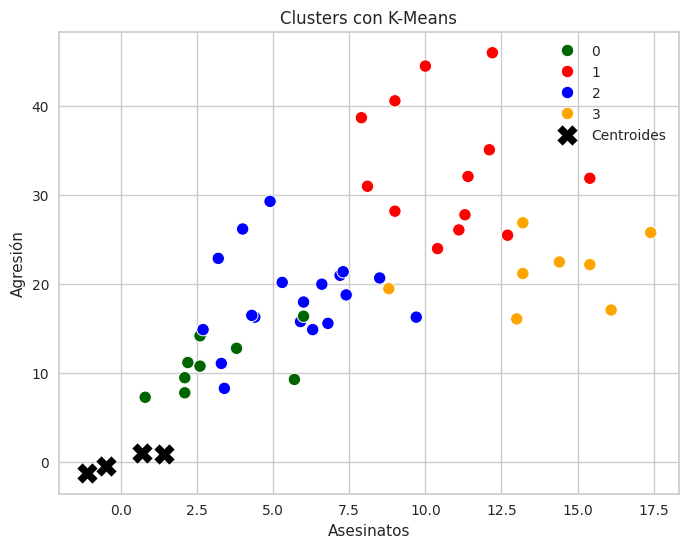

In [80]:
# Graficamos los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Murder', y='Rape', hue=df['Grupo'], palette=['darkgreen', 'red', 'blue', 'orange'], s=80)

# Graficamos los centroides
plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], c='black', marker='X', s=200, label='Centroides')

plt.legend()
plt.title("Clusters con K-Means")
plt.xlabel("Asesinatos")
plt.ylabel("Agresión")
plt.show()



In [83]:
# Mostrar los grupos y calcular la contribución en ventas de cada grupo
analisis_ = df.groupby('Grupo').agg(
    Asesinatos=('Murder', 'mean'),
    Agresion=('Assault', 'mean'),
    Violacion=('Rape', 'mean'),
    pro_Urban =('UrbanPop', 'mean')
).reset_index()
#analisis_[['Asesinatos','Agresion','Violacion']] = (analisis_[['Asesinatos','Agresion','Violacion']]/1000).round(2)
print("Promedios de grupo:")

Promedios de grupo:


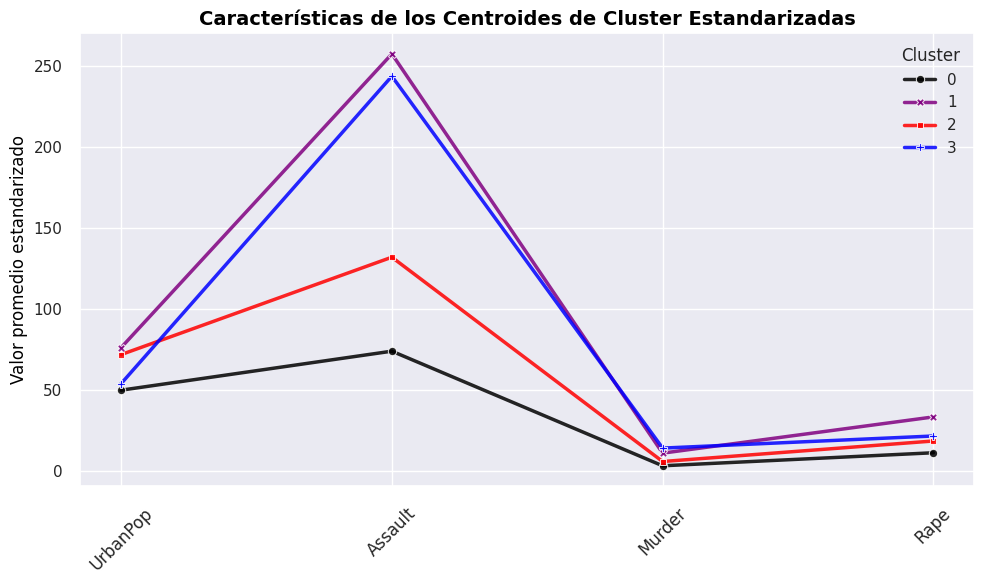

Grupo,0,1,2,3
UrbanPop,49.70,76.000000,71.684211,53.7500
Assault,73.80,257.384615,131.842105,243.6250
Murder,3.01,10.815385,5.642105,13.9375
Rape,11.06,33.192308,18.326316,21.4125


In [82]:
# Generamos el gráfico de líneas con Seaborn
mean_g = df.groupby('Grupo')[['UrbanPop','Assault','Murder','Rape']].mean().T

sns.set_theme(style="darkgrid")
custom_palette = ["black", "purple", "red", "blue"]
plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(
    data=mean_g,
    dashes=False,
    markers=True,
    linewidth=2.5,
    palette=custom_palette,
    alpha=0.85
)
plt.xticks(rotation=45, fontsize=12)
plt.title('Características de los Centroides de Cluster Estandarizadas', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Valor promedio estandarizado', fontsize=12, color='black')
plt.legend(title='Cluster', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()
mean_g

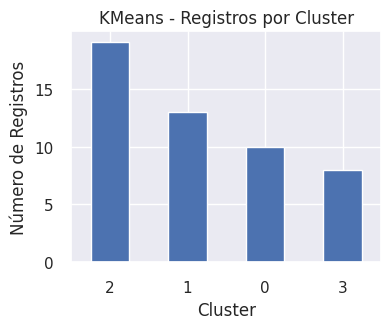

In [86]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
pd.value_counts(df['Grupo']).plot(kind='bar').set_title('KMeans - Registros por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Registros')
plt.tick_params(axis='x', rotation=0)
plt.show()

In [89]:
grupo0 =df[df.Grupo==0]
grupo1 =df[df.Grupo==1]
grupo2 =df[df.Grupo==2]
grupo3 =df[df.Grupo==3]
grupo2.head()

,Estados,Murder,Assault,UrbanPop,Rape,Grupo
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
13,Indiana,7.2,113,65,21.0,2
15,Kansas,6.0,115,66,18.0,2


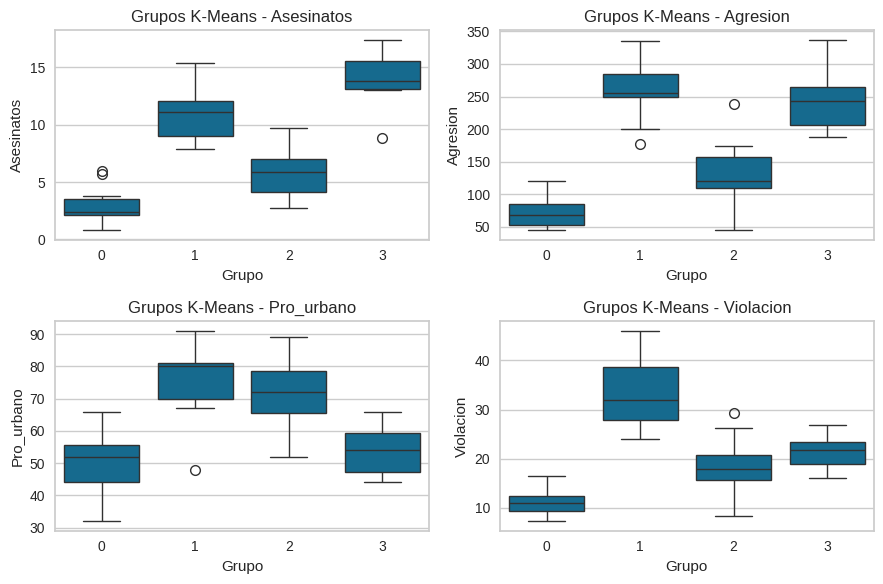

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Variables a graficar
variables = ['Asesinatos', 'Agresion', 'Pro_urbano', 'Violacion']

# Crear los boxplots para cada variable
for i, var in enumerate(variables):
    row, col = i // 2, i % 2  # Posición en la cuadrícula de subgráficos
    sns.boxplot(x=modelo.labels_, y=df[var], ax=axes[row, col])
    axes[row, col].set_title(f'Grupos K-Means - {var}')
    axes[row, col].set_xlabel("Grupo")
    axes[row, col].set_ylabel(var)

plt.tight_layout()  # Ajusta los espacios entre los gráficosplt.show()


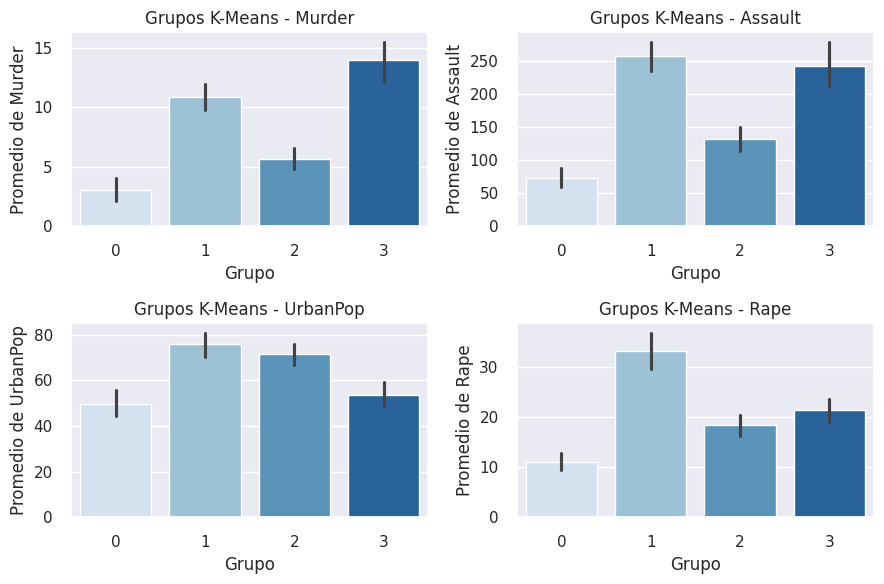

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Variables a graficar
variables = ['Murder', 'Assault', 'UrbanPop', 'Rape']

for i, var in enumerate(variables):
    row, col = i // 2, i % 2  # Posición en la cuadrícula de subgráficos
    sns.barplot(x=modelo.labels_, y=df[var], ax=axes[row, col], palette="Blues")
    axes[row, col].set_title(f'Grupos K-Means - {var}')
    axes[row, col].set_xlabel("Grupo")
    axes[row, col].set_ylabel(f'Promedio de {var}')

plt.tight_layout()
plt.show()

De acuerdo con la gráfica el promedio de Murder se ve con mayor presencia en el grupo 3. El promedio de asalto esta con mayor presencia en el grupo 3 seguido del grupo 1. El promedio de violencia esta mayormente presente en el grupo 1 seguido del grupo 3.

De manera general, el grupo 1 es quien tiene el mayor promedio poblacional la cual tambien presenta un mayor índice de Violencia, de asaltos y el segundo más alto en muertes.

Por otro lado, el grupo tres presenta el indice de muerte más elevado, el segundo más alto en asalto y en violencia y el tercer más poblado.

,Estados,Murder,Assault,UrbanPop,Rape
48,Wisconsin,2.6,5.3,66,10.8
14,Iowa,2.2,5.6,57,11.3
28,New Hampshire,2.1,5.7,56,9.5
11,Idaho,2.6,12.0,54,14.2
25,Montana,6.0,10.9,53,16.4
18,Maine,2.1,8.3,51,7.8
40,South Dakota,3.8,8.6,45,12.8
33,North Dakota,0.8,4.5,44,7.3
47,West Virginia,5.7,8.1,39,9.3
44,Vermont,2.2,4.8,32,11.2


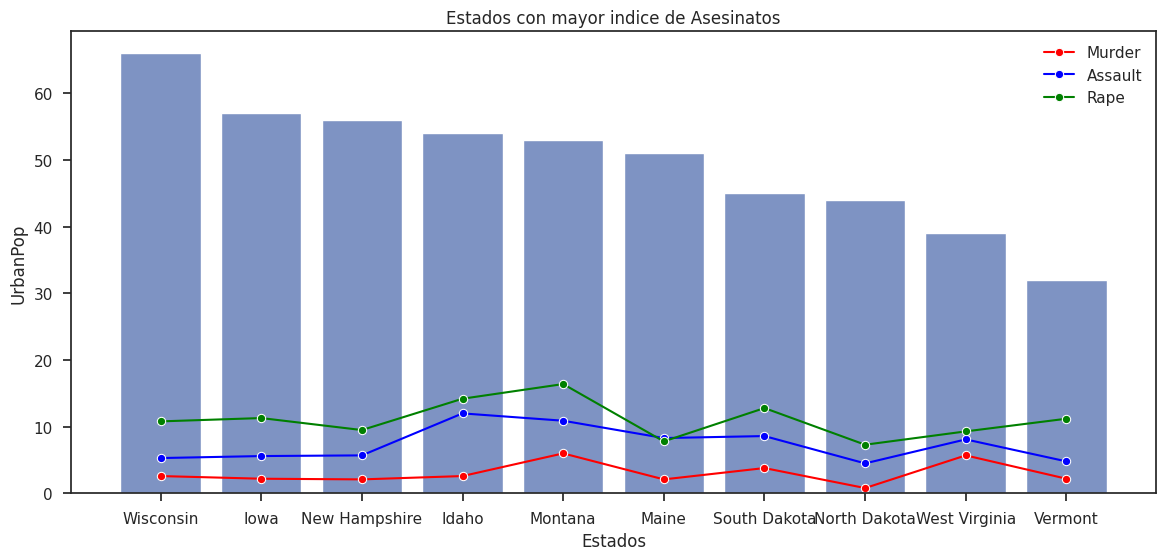

In [112]:
# Dado que las variables no tienen la misma unidad de medida por x y razón entonces transformemosla de tal manera que quede en la misma unidades de medida

df0 = grupo0[['Estados','Murder', 'Assault', 'UrbanPop', 'Rape']].sort_values(by=['UrbanPop'], ascending=False)
df0['Assault'] = df0['Assault']/10

plt.style.use('ggplot')  # Estilo similar a ggplot2
# sns.set_theme(  )
sns.set_theme(style="ticks")


plt.figure(figsize=(14,6))
sns.barplot(x = 'Estados', y = 'UrbanPop', data = df0, color = '#728FCE')

sns.lineplot(x = 'Estados', y = 'Murder', data = df0, marker = 'o', linestyle = 'solid', color = 'red', label = 'Murder')
sns.lineplot(x = 'Estados', y = 'Assault', data = df0, marker = 'o', linestyle = 'solid', color = 'blue', label = 'Assault')
sns.lineplot(x = 'Estados', y = 'Rape', data = df0, marker = 'o', linestyle = 'solid', color = 'green', label = 'Rape')
plt.title('Estados con mayor indice de Asesinatos')
plt.xlabel('Estados')
plt.legend()
df0

En este primer grupo $(df_0)$ se presenta que en *Wisconsin* se presenta el mayor numero de habitantes, asimismo se presenta mayor violencia que asaltos y menos muertes. Seguidamente, el estado Lowa presenta un promedio más alto en violencia y asaltos con respecto al estado de *Wisconsin* y menos muerte que el mismo estado. Por otro lado *New Hampshire* presenta menos violencia en comparación a *Wisconsin* y *Lowa* pero asu vez presenta un índice más alto asaltos con respecto a las dos comparaciones anteriores. El promedio de muertes en este es tado es relativamente similar al de los comparados...

In [126]:
def graf(df: pd.DataFrame()):
  df1 = df[['Estados','Murder', 'Assault', 'UrbanPop', 'Rape']].sort_values(by=['UrbanPop'], ascending=False).head(11)
  df1['Assault'] = df1['Assault']/10
  plt.style.use('ggplot')  # Estilo similar a ggplot2
  # sns.set_theme(  )
  sns.set_theme(style="ticks")
  plt.figure(figsize=(14,6))
  sns.barplot(x = 'Estados', y = 'UrbanPop', data = df1, color = '#728FCE')
  sns.lineplot(x = 'Estados', y = 'Murder', data = df1, marker = 'o', linestyle = 'solid', color = 'red', label = 'Murder')
  sns.lineplot(x = 'Estados', y = 'Assault', data = df1, marker = 'o', linestyle = 'solid', color = 'blue', label = 'Assault')
  sns.lineplot(x = 'Estados', y = 'Rape', data = df1, marker = 'o', linestyle = 'solid', color = 'green', label = 'Rape')
  plt.title('Estados con mayor indice de Asesinatos')
  plt.xlabel('Estados')
  plt.legend()
  print(df1)
  print('\n')
  print('####################### SE MUESTRA POR DEFECTO SOLO 10 ESTADOS #############################')
  print('\n')

       Estados  Murder  Assault  UrbanPop  Rape
4   California     9.0     27.6        91  40.6
31    New York    11.1     25.4        86  26.1
12    Illinois    10.4     24.9        83  24.0
27      Nevada    12.2     25.2        81  46.0
2      Arizona     8.1     29.4        80  31.0
8      Florida    15.4     33.5        80  31.9
42       Texas    12.7     20.1        80  25.5
5     Colorado     7.9     20.4        78  38.7
21    Michigan    12.1     25.5        74  35.1
24    Missouri     9.0     17.8        70  28.2
30  New Mexico    11.4     28.5        70  32.1


####################### SE MUESTRA POR DEFECTO SOLO 10 ESTADOS #############################




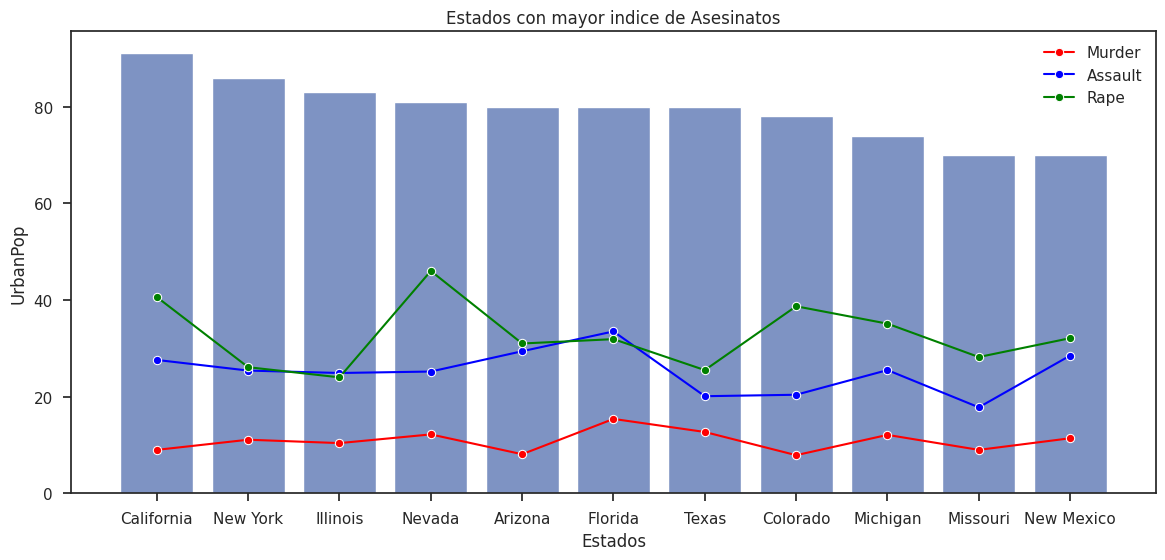

In [127]:
graf(grupo1)

          Estados  Murder  Assault  UrbanPop  Rape
29     New Jersey     7.4     15.9        89  18.8
38   Rhode Island     3.4     17.4        87   8.3
20  Massachusetts     4.4     14.9        85  16.3
10         Hawaii     5.3      4.6        83  20.2
43           Utah     3.2     12.0        80  22.9
6     Connecticut     3.3     11.0        77  11.1
34           Ohio     7.3     12.0        75  21.4
46     Washington     4.0     14.5        73  26.2
7        Delaware     5.9     23.8        72  15.8
37   Pennsylvania     6.3     10.6        72  14.9
35       Oklahoma     6.6     15.1        68  20.0


####################### SE MUESTRA POR DEFECTO SOLO 10 ESTADOS #############################




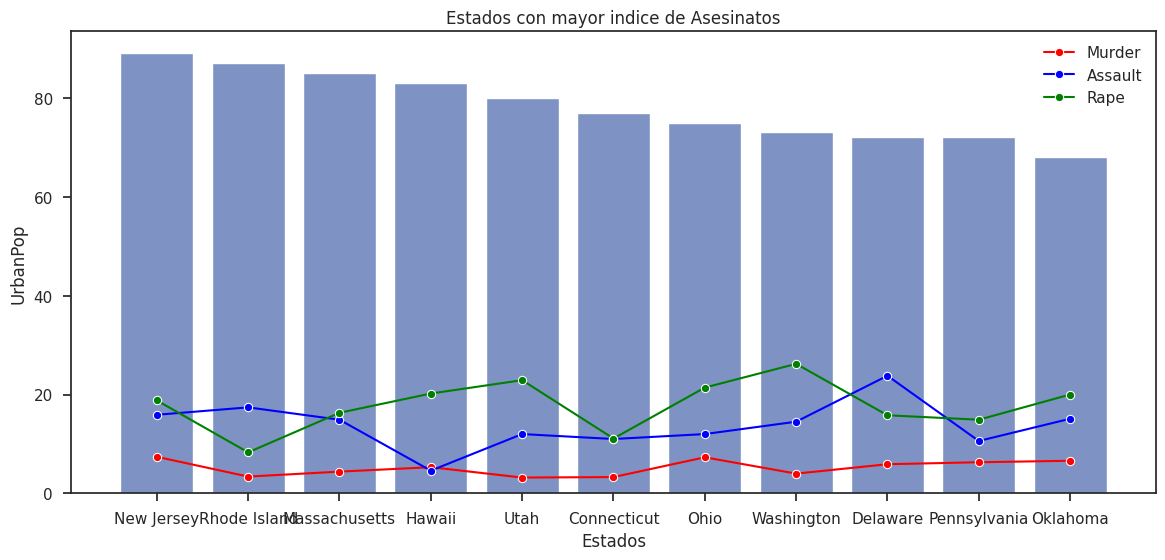

In [128]:
graf(grupo2)

           Estados  Murder  Assault  UrbanPop  Rape
17       Louisiana    15.4     24.9        66  22.2
9          Georgia    17.4     21.1        60  25.8
41       Tennessee    13.2     18.8        59  26.9
0          Alabama    13.2     23.6        58  21.2
3         Arkansas     8.8     19.0        50  19.5
39  South Carolina    14.4     27.9        48  22.5
32  North Carolina    13.0     33.7        45  16.1
23     Mississippi    16.1     25.9        44  17.1


####################### SE MUESTRA POR DEFECTO SOLO 10 ESTADOS #############################




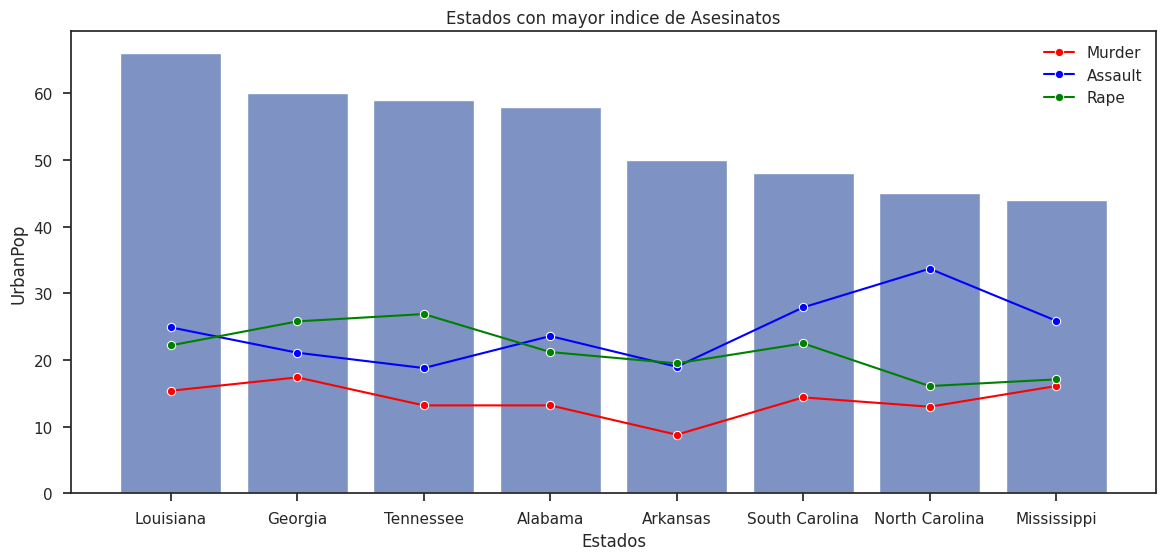

In [129]:
graf(grupo3)

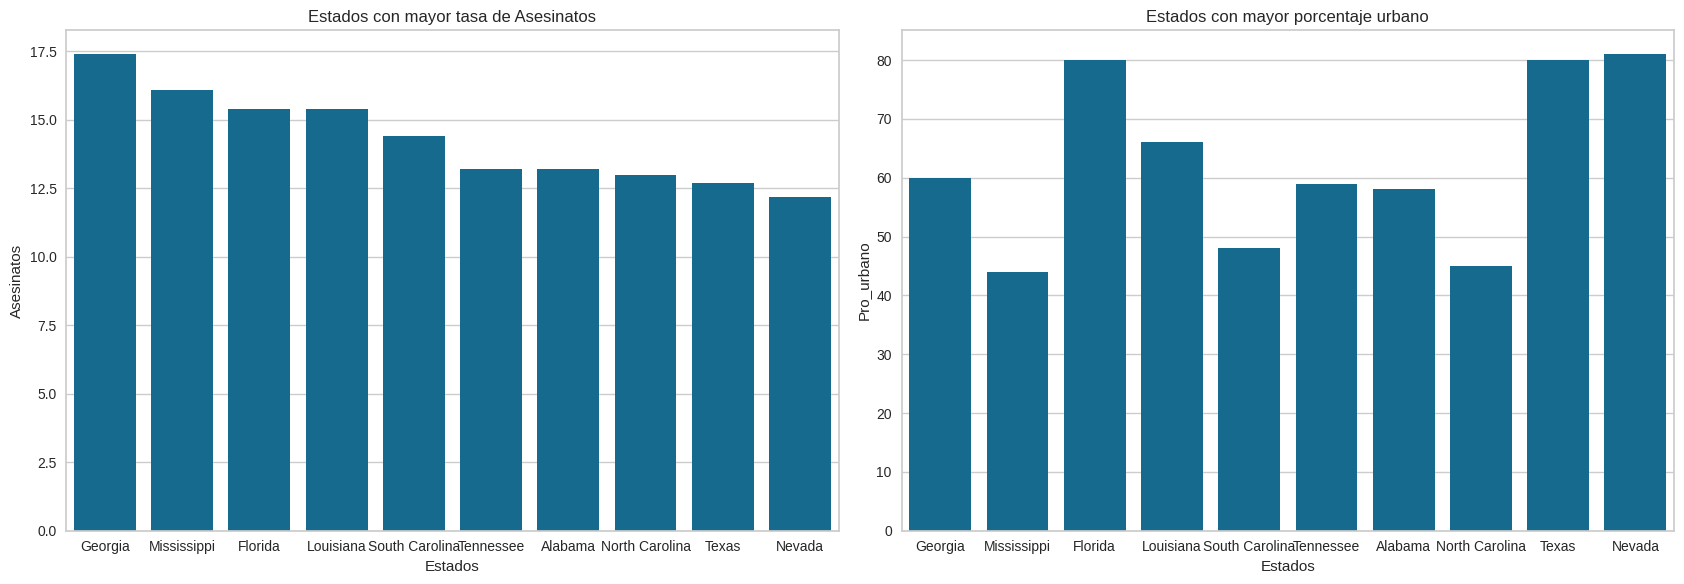

In [27]:

fig, axes = plt.subplots(1, 2, figsize=(17, 6), sharex=True)

# Gráfico de Asesinatos
sns.barplot(x='Estados', y='Asesinatos', data=Murder, ax=axes[0])
axes[0].set_title('Estados con mayor tasa de Asesinatos')
axes[0].set_xlabel('Estados')
axes[0].set_ylabel('Asesinatos')
axes[0].tick_params(axis='x', rotation=0)  # Rotar etiquetas en el eje X si es necesario

# Gráfico de Pro_urbano
sns.barplot(x='Estados', y='Pro_urbano', data=Murder, ax=axes[1])
axes[1].set_title('Estados con mayor porcentaje urbano')
axes[1].set_xlabel('Estados')
axes[1].set_ylabel('Pro_urbano')
axes[1].tick_params(axis='x', rotation=0)  # Rotar etiquetas en el eje X si es necesario

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar gráfico
plt.show()


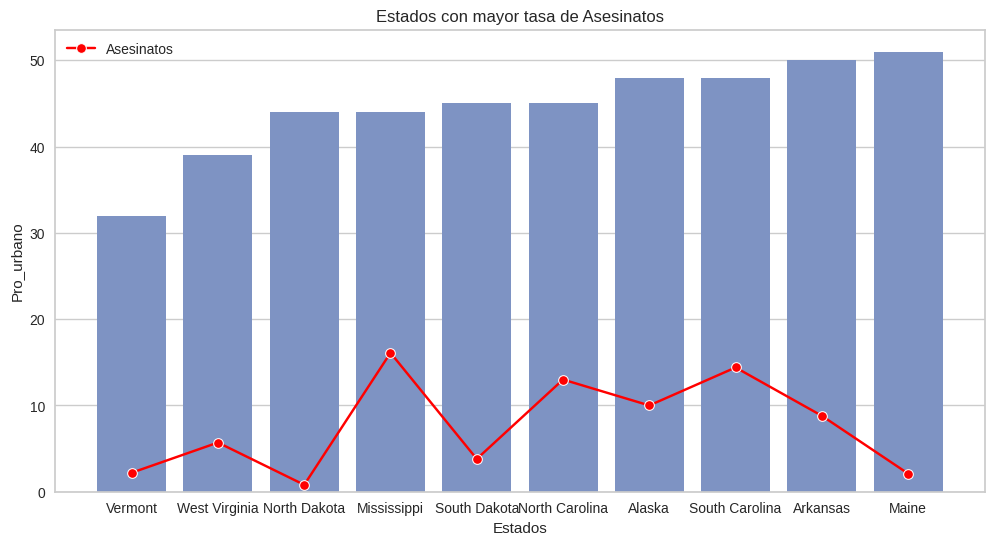

,Estados,Asesinatos,Violacion,Pro_urbano
44,Vermont,2.2,11.2,32
47,West Virginia,5.7,9.3,39
33,North Dakota,0.8,7.3,44
23,Mississippi,16.1,17.1,44
40,South Dakota,3.8,12.8,45
32,North Carolina,13.0,16.1,45
1,Alaska,10.0,44.5,48
39,South Carolina,14.4,22.5,48
3,Arkansas,8.8,19.5,50
18,Maine,2.1,7.8,51


In [55]:
Murder = df[['Estados','Asesinatos','Violacion', 'Pro_urbano']].sort_values(by=['Pro_urbano'], ascending = True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x = 'Estados', y = 'Pro_urbano', data = Murder, color = '#728FCE')

sns.lineplot(x='Estados', y='Asesinatos', data=Murder, marker='o', linestyle='solid', color='red', label='Asesinatos')
plt.title('Estados con mayor tasa de Asesinatos')
plt.xlabel('Estados')
plt.ylabel('Pro_urbano')
plt.xticks(rotation=0)
plt.legend()
plt.show()

Murder

In [58]:
# Indices de acesinatos
dfd = df.copy()
I = (dfd['Asesinatos']/dfd['Pro_urbano'])*100
df['I'] = I
df.head()

,Estados,Asesinatos,Agresion,Pro_urbano,Violacion,Grupo,I
0,Alabama,13.2,236,58,21.2,3,22.758621
1,Alaska,10.0,263,48,44.5,1,20.833333
2,Arizona,8.1,294,80,31.0,1,10.125000
3,Arkansas,8.8,190,50,19.5,3,17.600000
4,California,9.0,276,91,40.6,1,9.890110
